In [1]:
from pathlib import Path

from datasets import load_dataset
from PIL import Image
import pandas as pd
from tqdm.auto import tqdm

# Project root = the folder where you created everything
PROJECT_ROOT = Path.home() / "projects" / "handwriting_forge_project"

IAM_RAW_DIR = PROJECT_ROOT / "data" / "raw" / "iam"
IAM_RAW_DIR.mkdir(parents=True, exist_ok=True)

META_DIR = PROJECT_ROOT / "data" / "processed" / "metadata"
META_DIR.mkdir(parents=True, exist_ok=True)

IAM_META_PATH = META_DIR / "iam_metadata.csv"

PROJECT_ROOT, IAM_RAW_DIR, IAM_META_PATH


(PosixPath('/Users/adnanatif/projects/handwriting_forge_project'),
 PosixPath('/Users/adnanatif/projects/handwriting_forge_project/data/raw/iam'),
 PosixPath('/Users/adnanatif/projects/handwriting_forge_project/data/processed/metadata/iam_metadata.csv'))

In [2]:
iam = load_dataset("Teklia/IAM-line", split="train")
len(iam), iam[0]


README.md: 0.00B [00:00, ?B/s]

data/train.parquet:   0%|          | 0.00/167M [00:00<?, ?B/s]

data/validation.parquet:   0%|          | 0.00/24.7M [00:00<?, ?B/s]

data/test.parquet:   0%|          | 0.00/73.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6482 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/976 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2915 [00:00<?, ? examples/s]

(6482,
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2467x128>,
  'text': 'put down a resolution on the subject'})

In [6]:
TOTAL_SAMPLES = len(iam)

# For now, use full dataset. During testing you can set a smaller number like 500
MAX_SAMPLES = TOTAL_SAMPLES

num_samples = min(TOTAL_SAMPLES, MAX_SAMPLES)
num_samples


6482

In [7]:
rows = []

for idx in tqdm(range(num_samples), desc="Saving IAM images"):
    example = iam[idx]
    img: Image.Image = example["image"]
    text: str = example["text"]

    # Build filename and path
    filename = f"iam_{idx:05d}.png"
    out_path = IAM_RAW_DIR / filename

    # Save as PNG
    img.save(out_path)

    # Add row to metadata
    rows.append({
        "filepath": str(out_path.relative_to(PROJECT_ROOT)),  # relative path
        "source": "iam",
        "label": "genuine",
        "text": text,
        "idx": idx,
    })

len(rows)


Saving IAM images:   0%|          | 0/6482 [00:00<?, ?it/s]

6482

In [8]:
iam_df = pd.DataFrame(rows)
iam_df.to_csv(IAM_META_PATH, index=False)

IAM_META_PATH, iam_df.head()


(PosixPath('/Users/adnanatif/projects/handwriting_forge_project/data/processed/metadata/iam_metadata.csv'),
                      filepath source    label  \
 0  data/raw/iam/iam_00000.png    iam  genuine   
 1  data/raw/iam/iam_00001.png    iam  genuine   
 2  data/raw/iam/iam_00002.png    iam  genuine   
 3  data/raw/iam/iam_00003.png    iam  genuine   
 4  data/raw/iam/iam_00004.png    iam  genuine   
 
                                        text  idx  
 0      put down a resolution on the subject    0  
 1        and he is to be backed by Mr. Will    1  
 2     nominating any more Labour life Peers    2  
 3       M Ps tomorrow. Mr. Michael Foot has    3  
 4  Griffiths, M P for Manchester Exchange .    4  )

promiscuous mother . In such surroundings she


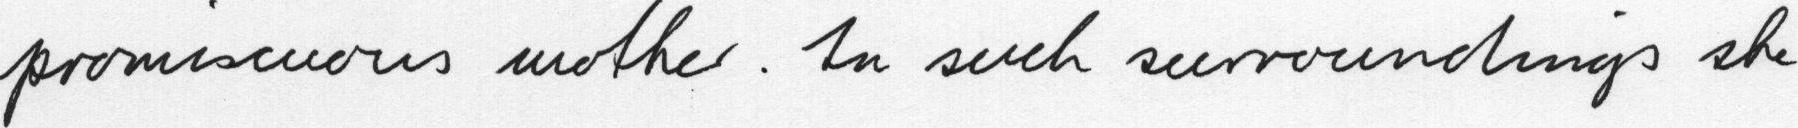

In [9]:
from IPython.display import display

sample_row = iam_df.sample(1).iloc[0]
print(sample_row["text"])
display(Image.open(PROJECT_ROOT / sample_row["filepath"]))
